# Section 1: Business understanding

This project is about Airbnb accommodation in Seattle.The analysis wll try to answer the following questions:

#### 1. What are the busiest times of the year to visit Seattle and how this reflects on prices.
#### 2. Whether there is a relationship between new listings and the demand over the years.
#### 3. What the main factors that affect the price of a listing are.


In [1]:
# Let's import the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline


# Section 2: Data understanding

### Gather

Let's start by loading the data

In [2]:
df_cal = pd.read_csv('./calendar.csv')
df_list = pd.read_csv('./listings.csv')
df_rev = pd.read_csv('./reviews.csv')


### Assess

Strong attention to detail starts with knowing how many rows and columns we have in the datasets

In [3]:
print(df_list.shape)
print(df_cal.shape)
print(df_rev.shape)


(3818, 92)
(1393570, 4)
(84849, 6)


Let's see what the listings table looks like and the data types of the columns

In [4]:
#As this table has 92 columns I will cancel the default max columns displayed (and set it back at 20 later on)
pd.set_option('display.max_columns',None)

df_list.head()



,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [5]:
print(df_list.info())

pd.set_option('display.max_columns',20)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

> Price is object type and we saw earlier that it is in currency format (e.g. $85.00). That will definitely need some cleaning at a later stage.

Quick investigation in id (looks like the primary key)

In [6]:

df_list['id'].nunique()

3818

> Number of distinct ids = Number of rows. It definetily is the primary key

What about Calendar dataset?

In [7]:
print(df_cal.head())
print(df_cal.info())

   listing_id        date available   price
0      241032  2016-01-04         t  $85.00
1      241032  2016-01-05         t  $85.00
2      241032  2016-01-06         f     NaN
3      241032  2016-01-07         f     NaN
4      241032  2016-01-08         f     NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB
None


>Same issue with price here. 
>Date will also need some cleaning as it is object type too. 


Let's understand a bit more about date field

In [8]:
# Min and max date. Also number of dates
print(df_cal['date'].min())
print(df_cal['date'].max())
print(df_cal['date'].nunique())


2016-01-04
2017-01-02
365


>Notice that number of listings (3818 ids in previous dataset) times number of dates here (365) is 3818*365=1393570. That's as many rows as we have in this table. So in the calendar we have the availability of each of the listings for each of the following (from 4th Jan 2016) 365 days.Availability given by column 'available' as true (t) or false (f)

Let's investigate on column 'available'. From a rough look at the data above it seems that there is no price when the listing is unavailable.

In [9]:
print(df_cal[df_cal.available=='f']['price'].isnull().mean()*100)
print(df_cal[df_cal.available=='t']['price'].isnull().mean()*100)

100.0
0.0


>The code above confirms that our assumption is true. The days when the listing is booked might need to be dropped in the analysis below.

Finally, some data assessment in the reviews table

In [10]:
print(df_rev.head())
print(df_rev.info())

   listing_id        id        date  reviewer_id reviewer_name  \
0     7202016  38917982  2015-07-19     28943674        Bianca   
1     7202016  39087409  2015-07-20     32440555         Frank   
2     7202016  39820030  2015-07-26     37722850           Ian   
3     7202016  40813543  2015-08-02     33671805        George   
4     7202016  41986501  2015-08-10     34959538          Ming   

                                            comments  
0  Cute and cozy place. Perfect location to every...  
1  Kelly has a great room in a very central locat...  
2  Very spacious apartment, and in a great neighb...  
3  Close to Seattle Center and all it has to offe...  
4  Kelly was a great host and very accommodating ...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  

It would be interesting to see what the date range is

In [11]:
print(df_rev['date'].min())
print(df_rev['date'].max())
print(df_rev['date'].nunique())

2009-06-07
2016-01-03
1930


> We have data from the previous 6 and a half years. 



### Let's see what data can be used for each question

* Question 1: The data from reviews table (previous 6 years) can be used to count reviews (therefore bookings) by calendar month. This will show the busiest months of the year. Then the calendar table will show avarage price by month for the current calendar year (2016). We can then compare the trends from the two tables


* Question 2: The data from reviews table can also be summarised by year in order to reveal the year by year increase in the number of listings and in the number of bookings (assuming that most customers provide a review). 


* Question 3: We will be mainly based in data from listings table as there are is plenty of factors that potentially affect the price. 

# Section 3: Data preparation

### Data cleaning


Firstly we use the date from reviews table to create two extra columns for question 1: 
    
* Calendar month (will be used in the graph)
* Month as a number (1 to 12 - will help with sorting)


In [12]:
df_rev['month_name']=pd.to_datetime(df_rev['date'],format='%Y-%m-%d').dt.month_name()
df_rev['month']=pd.to_datetime(df_rev['date'],format='%Y-%m-%d').dt.month

Let's test if it worked

In [13]:
df_rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,month_name,month
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,July,7
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,July,7
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb...",July,7
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...,August,8
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...,August,8


Let's drop any missing prices in the calendar table. The rest of the data is more than enough for inferences to be made



In [14]:
df_cal_prices=df_cal.dropna(subset='price',axis=0)


Some more data preparation is also needed as price comes in currency format (string has been used in the dataset)
We need to change it to numeric


In [15]:
df_cal_prices['price_num']=df_cal_prices['price'].str.replace('$','').str.replace(',','').astype('float')

C:\Users\KokkinopoulosG\AppData\Local\Temp\ipykernel_4496\289769154.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_cal_prices['price_num']=df_cal_prices['price'].str.replace('$','').str.replace(',','').astype('float')
C:\Users\KokkinopoulosG\AppData\Local\Temp\ipykernel_4496\289769154.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cal_prices['price_num']=df_cal_prices['price'].str.replace('$','').str.replace(',','').astype('float')


Same as with reviews table. Let's create month name and month number 1-12 (will help with sorting) in the calendar table


In [16]:
df_cal_prices['month_name']=pd.to_datetime(df_cal_prices['date'],format='%Y-%m-%d').dt.month_name()
df_cal_prices['month']=pd.to_datetime(df_cal_prices['date'],format='%Y-%m-%d').dt.month


C:\Users\KokkinopoulosG\AppData\Local\Temp\ipykernel_4496\539232523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cal_prices['month_name']=pd.to_datetime(df_cal_prices['date'],format='%Y-%m-%d').dt.month_name()
C:\Users\KokkinopoulosG\AppData\Local\Temp\ipykernel_4496\539232523.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cal_prices['month']=pd.to_datetime(df_cal_prices['date'],format='%Y-%m-%d').dt.month


We are going to need year instead of month for question 2 so let's add it in reviews table as well as month.


In [17]:
df_rev['year']=pd.to_datetime(df_rev['date'],format='%Y-%m-%d').dt.year


For question 3 we will create a copy of listings table where the price format will change to number (as in the calendar dataset above)

In [18]:
df_list_prices=df_list
df_list_prices['price_num']=df_list_prices['price'].str.replace('$','').str.replace(',','').astype('float')


C:\Users\KokkinopoulosG\AppData\Local\Temp\ipykernel_4496\1252348457.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_list_prices['price_num']=df_list_prices['price'].str.replace('$','').str.replace(',','').astype('float')


Let's also pick some of the variables which seem to be of particular effect on the price. We will also include the price in this list which obviously is NOT and independent variable as the name of the list below states - it's the response one. I have just put it here so that I can calculate its correlation with the actually independent ones (all others then)



In [19]:

independent_variables=['price_num','host_response_rate','host_acceptance_rate','host_is_superhost','neighbourhood_group_cleansed','property_type',
                       'room_type','accommodates','bathrooms','bedrooms','beds','bed_type','security_deposit',
                       'cleaning_fee','guests_included','extra_people','minimum_nights','maximum_nights','availability_30',
                       'availability_60','availability_90','availability_365','number_of_reviews',
                       'review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
                       'review_scores_communication','review_scores_location','review_scores_value','instant_bookable',
                       'cancellation_policy','require_guest_profile_picture','require_guest_phone_verification','reviews_per_month',
                       'is_location_exact'
                      ]



Let's narrow down to the necessary variables (that's the main reason for using this copy table)


In [20]:
df_list_prices=df_list_prices[independent_variables]

# Section 4: Evaluation


## Question 1


### Analyse

* We will calculate the number of reviews by calendar month (e.g. how many reviews we had in all Januaries together from 2009 to 2015)

In [21]:
df_rev_by_month=df_rev.groupby(['month_name','month']).id.nunique().reset_index().sort_values(['month'])
df_rev_by_month

,month_name,month,id
4,January,1,2867
3,February,2,2643
7,March,3,4158
0,April,4,4233
8,May,5,5854
6,June,6,8544
5,July,7,10503
1,August,8,13018
11,September,9,11677
10,October,10,8955


> Quite obvious from the table above that Seattle is a summer destination.
> However an informative graph is always better than mere numbers. Let's give it a try then



### Visualise

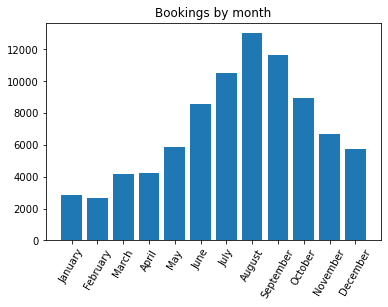

In [22]:
plt.bar(df_rev_by_month.month_name,df_rev_by_month.id);
plt.title('Bookings by month');
plt.xticks(rotation=60);


* Looks like Normal distribution peaked around August, slightly negatively skewed towards fall rather than winter.
* Does this reflect on the prices of the listings at all? The calendar dataset has the prices for 2016 for the dates
in which each listing is available. Let's see what it tells us.

#### Let's do the same steps for prices

As earlier let's group price by month (in this case it is for 2016 only from calendar table). Average price will be calculated


In [23]:
df_cal_prices_monthly=df_cal_prices.groupby(['month_name','month']).mean()['price_num'].reset_index().sort_values(['month'])


In [24]:
df_cal_prices_monthly

,month_name,month,price_num
4,January,1,122.912176
3,February,2,124.293927
7,March,3,128.644488
0,April,4,135.097005
8,May,5,139.538183
6,June,6,147.473137
5,July,7,152.094150
1,August,8,150.656594
11,September,9,143.255949
10,October,10,137.031939


>Similar inference with previous table - summer being a bit more pricey.But the graph tells more of the truth not caught by eye in the table
 


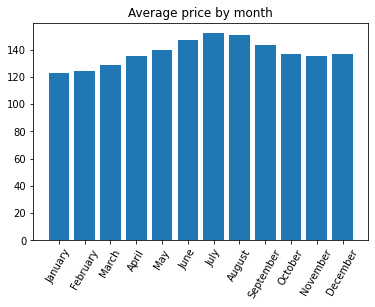

In [25]:
plt.bar(df_cal_prices_monthly.month_name,df_cal_prices_monthly.price_num);
plt.title('Average price by month');
plt.xticks(rotation=60);

>Yet another slightly negatively (towards fall) skewed Normal distribution. So prices tend to follow demand. But does it happen quite proportionately? See calculation below:

In [26]:
print('Total bookings in August of previous years: ',list(df_rev_by_month[df_rev_by_month.month_name=='August']['id'])[0]),
print('Total bookings in January of previous years: ',list(df_rev_by_month[df_rev_by_month.month_name=='January']['id'])[0])
print("That's an increase of ",round((list(df_rev_by_month[df_rev_by_month.month_name=='August']['id'])[0]/
list(df_rev_by_month[df_rev_by_month.month_name=='January']['id'])[0]-1)*100,1),'%')


Total bookings in August of previous years:  13018
Total bookings in January of previous years:  2867
That's an increase of  354.1 %


In [27]:
print('Average price in August for current year: $',round(list(df_cal_prices_monthly[df_cal_prices_monthly.month_name=='August']['price_num'])[0],2)),
print('Average price in January for current year: $',round(list(df_cal_prices_monthly[df_cal_prices_monthly.month_name=='January']['price_num'])[0],2)),
print("That's an increase of ",round((list(df_cal_prices_monthly[df_cal_prices_monthly.month_name=='August']['price_num'])[0]/
list(df_cal_prices_monthly[df_cal_prices_monthly.month_name=='January']['price_num'])[0]-1)*100,1),'%')


Average price in August for current year: $ 150.66
Average price in January for current year: $ 122.91
That's an increase of  22.6 %


>The price increase is not as big as the increase in demand

#### Is there an explanation for this difference?

Let's calculate the percantage of listings with a flat rate throughout  the year applied

In [28]:
distinct_prices_per_listing=df_cal_prices.groupby(['listing_id']).price.nunique()
flat_rate_listings=distinct_prices_per_listing==1
flat_rate_listings_percent=round(flat_rate_listings.mean()*100,1)
print(flat_rate_listings_percent,'% of the listings apply a flat rate throught the year')

43.2 % of the listings apply a flat rate throught the year


>It seems not all owners price their properties in the summer as high as they could which keeps the spike down

## Question 2

### Analyse

Excluding the first 3 days of the current year (2016) and any reviews been made so far, let's calculate the number of listings been reviewed over the years as well as the number of reviews (id) and number of unique reviewers (reviewer_id)


In [29]:
df_rev_summary_year=df_rev[df_rev.year!=2016].groupby(['year'])['listing_id','id','reviewer_id'].nunique().reset_index()

C:\Users\KokkinopoulosG\AppData\Local\Temp\ipykernel_4496\3495608446.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_rev_summary_year=df_rev[df_rev.year!=2016].groupby(['year'])['listing_id','id','reviewer_id'].nunique().reset_index()


In [30]:
df_rev_summary_year

,year,listing_id,id,reviewer_id
0,2009,4,17,16
1,2010,35,254,238
2,2011,96,1169,1107
3,2012,232,3251,3051
4,2013,508,7077,6644
5,2014,1203,20365,18928
6,2015,3091,52493,48089


>As expected, an upward trend in all 3 metrics but the variation in the numbers make it hard for inference.Let's put another bar chart then (grouped this time)


### Visualise

In [31]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

Let's also create a function for this visualisation in case we need to use it again

In [32]:
def grouped_bar_chart(df,col1,col2,col3):
    '''
    It provides the count of values by year from 3 different columns in a dataframe
    
    Input: The data frame and the 3 column names
    
    Output: Grouped bar chart with all 3 metrics
    
    '''
    
    years = np.arange(len(df['year']))
    listings=df[col1]
    reviews=df[col2]
    reviewers=df[col3]
    width=0.2
    
    plt.bar(years-width, listings, width, color='green')
    plt.bar(years, reviewers, width, color='blue')
    plt.bar(years+width, reviews, width, color='red')

    plt.xticks(years, list(df['year']))
    plt.xlabel("Years")
    plt.ylabel("Totals")
    plt.legend(["Listings","Reviewers", "Reviews" ])

    plt.show()
    
    

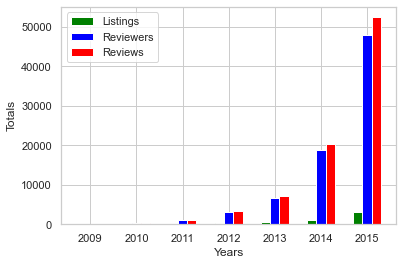

In [33]:
grouped_bar_chart(df_rev_summary_year,'listing_id','id','reviewer_id')

First 3-4 years really tiny compared to subsequent ones. Absolute numbers don't tell much of the truth here...
Shall we look into percentage increase instead?

Calculations. Let's create a temporary table with % increase (will be renamed to permanent table if ready to be used)

In [34]:
df_rev_pct_change_temp=df_rev_summary_year.set_index('year').pct_change()*100

In [35]:
df_rev_pct_change_temp_rounded=round(df_rev_pct_change_temp,0)

In [36]:
df_rev_pct_change_temp_rounded

,listing_id,id,reviewer_id
year,,,
2009,NaN,NaN,NaN
2010,775.0,1394.0,1388.0
2011,174.0,360.0,365.0
2012,142.0,178.0,176.0
2013,119.0,118.0,118.0
2014,137.0,188.0,185.0
2015,157.0,158.0,154.0


First year obviously needs to be discarded and this is going to be the final table


In [37]:
df_rev_pct_change=df_rev_pct_change_temp_rounded.reset_index()[1:]

In [38]:
df_rev_pct_change

,year,listing_id,id,reviewer_id
1,2010,775.0,1394.0,1388.0
2,2011,174.0,360.0,365.0
3,2012,142.0,178.0,176.0
4,2013,119.0,118.0,118.0
5,2014,137.0,188.0,185.0
6,2015,157.0,158.0,154.0


It turns out to be a wise decision to create a function for the graph as it will be used for a second graph

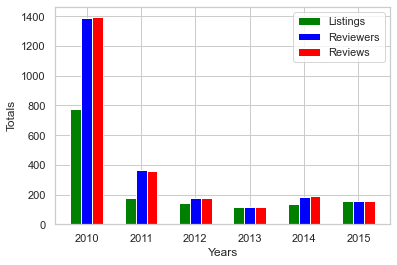

In [39]:
grouped_bar_chart(df_rev_pct_change,'listing_id','id','reviewer_id')

### Inference

* We can see that from 2012 onwards the percentage increase in listings and bookings (as shown by reviews) follow each other. 
* That wasn't particularly the case in the first two years though as the demand there was more rapidly increased than the supply, possibly due to the increasing popularity of Airbnb as a platform

## Question 3

#### Extra data preparation might be needed. Let's see

The table with the independent variables and the response one was created earlier. What if I try to drop missing data in the categorical variables 


In [40]:

df_list_prices.dropna(subset=['is_location_exact','neighbourhood_group_cleansed','property_type','room_type','bed_type',
                              'host_is_superhost','instant_bookable','cancellation_policy','require_guest_profile_picture',
                              'require_guest_phone_verification']
                      ,axis=0).shape
               

(3815, 36)

>3815 of the initial 3818 values remain - not a big loss so let's give it a go.

In [41]:
df_list_prices.dropna(subset=['is_location_exact','neighbourhood_group_cleansed','property_type','room_type','bed_type',
                              'host_is_superhost','instant_bookable','cancellation_policy','require_guest_profile_picture',
                              'require_guest_phone_verification']
                      ,axis=0,inplace=True)
               

C:\Users\KokkinopoulosG\AppData\Local\Temp\ipykernel_4496\2782531203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list_prices.dropna(subset=['is_location_exact','neighbourhood_group_cleansed','property_type','room_type','bed_type',


Are things equally good if I drop missing data in the numeric ones?


In [42]:
df_list_prices.dropna(subset=['host_acceptance_rate','bathrooms','bedrooms','beds','availability_30','availability_60','availability_90',
                              'availability_365','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
                              'review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value',
                              'reviews_per_month','host_response_rate','accommodates','security_deposit','cleaning_fee','guests_included',
                              'extra_people','minimum_nights','maximum_nights'],axis=0).shape

(1233, 36)

* Not as good news here. Only 1233 rows (around 30%) remain here.Dropping is not recommended then.
* Even imputting (by using mean perhaps) is risky, so let's see the big picture: 
* Are all these variables considerably correlated with price? Let's see below:

Let's put all numeric explanatory (as well as the response) variables together


In [43]:
num_vars=['price_num','host_acceptance_rate','bathrooms','bedrooms','beds','availability_30','availability_60','availability_90',
                              'availability_365','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
                              'review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value',
                              'reviews_per_month','host_response_rate','accommodates','security_deposit','cleaning_fee','guests_included',
                              'extra_people','minimum_nights','maximum_nights']

### Analyse

I am going to need to see all correlations available so let's change the settings


In [44]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


Below is the correlations table... or, to be honest, a subset of that looking at price's column only


In [45]:
df_list_prices[num_vars].corr()['price_num']

price_num                      1.000000
bathrooms                      0.516703
bedrooms                       0.628138
beds                           0.589924
availability_30               -0.037223
availability_60               -0.048817
availability_90               -0.058222
availability_365              -0.014980
number_of_reviews             -0.124598
review_scores_rating           0.055551
review_scores_accuracy         0.019026
review_scores_cleanliness      0.054357
review_scores_checkin          0.007877
review_scores_communication    0.012990
review_scores_location         0.075069
review_scores_value           -0.041776
reviews_per_month             -0.218588
accommodates                   0.652665
guests_included                0.393150
minimum_nights                 0.017329
maximum_nights                -0.003448
Name: price_num, dtype: float64

* Bathrooms, bedrooms and beds are quite strongly correlated to price (as expected) as well as accomodates (number of people) and guests included.  
* Number of reviews seem to be important too (though negatively) as well as monthly reviews.
* But these two sets of variables seem to contain variables correlated to each other as they describe similar or related things.
* So let's look closer at the correlation of these variables only to each other


In [46]:

num_vars_new=['price_num','bedrooms','bathrooms','beds','reviews_per_month','number_of_reviews',
              'accommodates','guests_included']


A heatmap will make the difference here


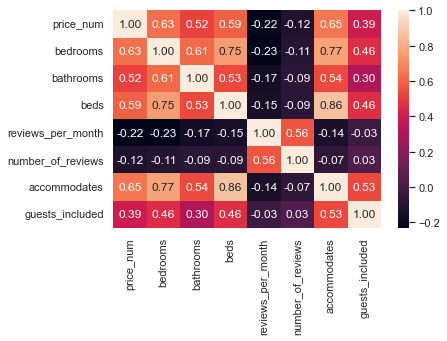

In [47]:
sns.heatmap(df_list_prices[num_vars_new].corr(), annot=True, fmt=".2f");

* As expected, bathrooms, bedrooms,beds, accomodates and guests included are quite strongly correlated to each other
* Same with number of review and reviews per month
* Let's see missing values before we decide what is discarded

In [48]:
df_list_prices[num_vars_new].isnull().sum()

price_num              0
bedrooms               6
bathrooms             16
beds                   1
reviews_per_month    624
number_of_reviews      0
accommodates           0
guests_included        0
dtype: int64

* It seems that bedrooms is a good option (only 6 missing values and very high correlation)
* On the other hand reviews per month has bigger correlation with price (0.22 to 0.12) than number of reviews but it drops 624 rows (around 16%) so the latter will be selected


In [49]:
num_vars_3=['bedrooms','number_of_reviews']

In [50]:
# Bring settings back to default
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 20)

Let's remove missing values


In [51]:
df_list_prices.dropna(subset='bedrooms',axis=0,inplace=True)

C:\Users\KokkinopoulosG\AppData\Local\Temp\ipykernel_4496\3761314149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list_prices.dropna(subset='bedrooms',axis=0,inplace=True)


Let's see what happens with the categorical variables 


In [52]:
cat_vars=['is_location_exact','neighbourhood_group_cleansed','property_type','room_type','bed_type',
                              'host_is_superhost','instant_bookable','cancellation_policy','require_guest_profile_picture',
                              'require_guest_phone_verification']

We will create the dummy ones


In [53]:
for var in  cat_vars:
        
        df_list_prices = pd.concat([df_list_prices.drop(var, axis=1), pd.get_dummies(df_list_prices[var], prefix=var, prefix_sep='_')], axis=1)
    

Finally let's drop the variables that have been discarded


In [54]:
df_list_prices.drop(['host_acceptance_rate','accommodates','bathrooms','beds','availability_30','availability_60','availability_90','availability_365',
                     'review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
                     'review_scores_communication','review_scores_location','review_scores_value','reviews_per_month','host_response_rate',
                      'security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights',
                     'maximum_nights'],axis=1,inplace=True)

In [55]:
df_list_prices.shape

(3809, 57)

## Data Modeling

Let's separate the independent variables from the response one and split into training and testing set


In [56]:
y=df_list_prices['price_num']
X=df_list_prices.drop(['price_num'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



### Fit the model

In [57]:

lm_model = LinearRegression(normalize=True) 
lm_model.fit(X_train, y_train) 


    

c:\Miniconda\Miniconda3\envs\basic_env\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

### And validate the model

In [58]:
#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)


So let's test our work


In [59]:
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 0.5508444680471313.  The rsquared on the test data was -1.239683540223447e+22.


* Training data is good but test data is almost 0. Too much overfitting
* Did we discard any categorical variables at all?
* What if there is correlation between them?


Let's isolote the numeric ones first and do the same steps.We will look into categorical ones later

In [60]:
X2=df_list_prices[num_vars_3]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=42)


In [61]:

lm_model2 = LinearRegression(normalize=True) # Instantiate
lm_model2.fit(X2_train, y2_train) #Fit

#Predict using your model
y2_test_preds = lm_model2.predict(X2_test)
y2_train_preds = lm_model2.predict(X2_train)

#Score using your model
test_score = r2_score(y2_test, y2_test_preds)
train_score = r2_score(y2_train, y2_train_preds)


c:\Miniconda\Miniconda3\envs\basic_env\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


Test results again


In [62]:
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 0.3989135084603903.  The rsquared on the test data was 0.39554074990083854.


> Test set does equally good here.It seems that the numeric variables we picked was a good choice. Let's see the coefficients then

In [63]:
print(lm_model.fit(X2_train, y2_train).coef_)
print(lm_model.fit(X2_train, y2_train).intercept_)


[62.68345    -0.14729674]
48.96391374915629


c:\Miniconda\Miniconda3\envs\basic_env\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\Miniconda\Miniconda3\envs\basic_env\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline i

### Further analyse

Let's investigate if there are any categorical variables that affect price more than others


In [64]:
cat_vars2=list(df_list_prices.select_dtypes(include='uint8').columns)
cat_vars2.insert(0,'price_num')

Below is the correlations table


In [65]:
pd.set_option('display.max_rows',None)
print(df_list_prices[cat_vars2].corr()['price_num'])
pd.set_option('display.max_rows',10)

price_num                                           1.000000
is_location_exact_f                                -0.016068
is_location_exact_t                                 0.016068
neighbourhood_group_cleansed_Ballard               -0.009247
neighbourhood_group_cleansed_Beacon Hill           -0.065948
neighbourhood_group_cleansed_Capitol Hill           0.012803
neighbourhood_group_cleansed_Cascade                0.020767
neighbourhood_group_cleansed_Central Area           0.001313
neighbourhood_group_cleansed_Delridge              -0.072035
neighbourhood_group_cleansed_Downtown               0.117111
neighbourhood_group_cleansed_Interbay              -0.010876
neighbourhood_group_cleansed_Lake City             -0.052314
neighbourhood_group_cleansed_Magnolia               0.070206
neighbourhood_group_cleansed_Northgate             -0.063949
neighbourhood_group_cleansed_Other neighborhoods   -0.045508
neighbourhood_group_cleansed_Queen Anne             0.093840
neighbourhood_group_clea

>It seems that variables related to room type and cancellation policy are the most important ones.So let's add them to the numerical ones

In [66]:
mixed_vars=['bedrooms','number_of_reviews','room_type_Entire home/apt','room_type_Private room','room_type_Shared room',
'cancellation_policy_flexible','cancellation_policy_moderate','cancellation_policy_strict']

## Data modelling 2

In [67]:
X3=df_list_prices[mixed_vars]

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.3, random_state=42)

lm_model3 = LinearRegression(normalize=True) # Instantiate
lm_model3.fit(X3_train, y3_train) #Fit

#Predict using your model
y3_test_preds = lm_model3.predict(X3_test)
y3_train_preds = lm_model3.predict(X3_train)

#Score using your model
test_score = r2_score(y3_test, y3_test_preds)
train_score = r2_score(y3_train, y3_train_preds)


c:\Miniconda\Miniconda3\envs\basic_env\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


## Evaluate 

In [68]:

print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))
print('Coefficients are: ',lm_model.fit(X3_train, y3_train).coef_)
print('Intercept is: ',lm_model.fit(X3_train, y3_train).intercept_)

The rsquared on the training data was 0.4894220447278539.  The rsquared on the test data was 0.4843623938828233.
Coefficients are:  [ 54.30813831  -0.13381161  29.00708272 -22.61063674 -55.05768324
  -2.84829265  -5.20850281   7.50734196]
Intercept is:  48.54190422211971


c:\Miniconda\Miniconda3\envs\basic_env\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\Miniconda\Miniconda3\envs\basic_env\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline i

* Substantially better than earlier the first model
* R squared is at 48% up from 39% and it's almost the same in both sets so this model fits perfectly to the test set
* An extra room would increase the price by 54 dollars whereas Entire apartments are about 51 dollars (difference between 29 and -22) more expensive than private rooms.
* Finally, a strict cancellation policy plays a positive role in the price compared to flexible and moderate (10 dollars up 
compared to flexible)